# RGB and Synesthesia

Before you start, make sure that you have the correct kernel. Check if the kernel is "Python 2" (there is a legend in the upper right corner, below the "Logout" button). If it is not Python 2, select Kernel → Change Kernel → Python 2 in the menu bar.
Make sure that you fill any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", and that you erase the line "raise NotImplementedError()" in the code cells.

# Introduction: 

Today we will use Python to "hear the color" of an image. We will do two consecutive exercises: 

1. First, we'll load a regular RGB image and we'll map each of the three color channels to a particular sound. By clicking on each pixel, you'll hear the three sounds (colors), with the volume of each sound proportional to the intensity of its corresponding color channel. <br><br>

2. Next, we'll load a hyperspectral image into Python. We will create an RGB representation of the hyperspectral image (so that we can visualize it in the computer screen.) Then, we'll map additional channels of different wavelengths to different sounds, with the volume of each sound proportional to the intensity of its corresponding "extra" channel. 

In addition to the usual image and array manipulations, we'll be using a Python library  called [PyGame](http://www.pygame.org/wiki/about) for computer game programming. PyGame will let us interact with an image and emit sounds in response to a mouse click. 

In preparation for the final python code, we will do several introductory exercises in this Jupyter notebook. When we're ready, we will put it all together in a Python script using the [Sublime Text Editor](https://www.sublimetext.com/). This script - unlike the cells in this and other Jupyter notebooks -  will be executed from the command line (terminal).

# Import modules

Discuss with your instructors what's each module / library is used for.

In [1]:
import pygame
import matplotlib.image as mpimg
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Loading images and basic array and channel manipulations:

#### Load an image file called Sample.jpg that's stored in the image_dir directory: 

In [4]:
### BEGIN SOLUTION

### END SOLUTION

#### What are the dimensions of this image file?

In [5]:
### BEGIN SOLUTION

### END SOLUTION

(286, 800, 3)

What do those three numbers mean?

Store the height and width of the image: 

In [6]:
height = my_image.shape[0]
width = my_image.shape[1]

#### Let's display the image:

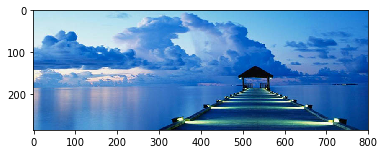

In [7]:
### BEGIN SOLUTION

### END SOLUTION

#### Store each of the three channels (Red, Green, Blue) separately as different variables: <br>

We'll do the first one for you: 

In [8]:
red_channel = my_image[:,:,0]

### BEGIN SOLUTION

### END SOLUTION

Get the maximum value of each channel. Store in separate variables:

In [9]:
max_red = np.max(red_channel)
### BEGIN SOLUTION

### END SOLUTION

#### Make a histogram showing the distribution of pixel values for the red channel:

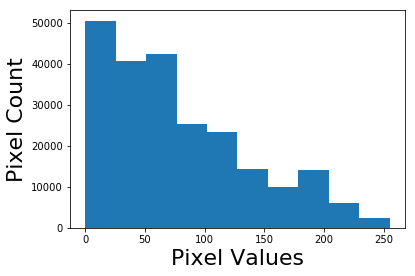

In [10]:
# turn matrix of pixel intensities into 1-D array using np.reshape():
len_array = red_channel.shape[0]*red_channel.shape[1]
red_array = np.reshape(red_channel, len_array)

# make histogram 
hist = plt.hist(red_array)
plt.xlabel('Pixel Values', fontsize = 22)
plt.ylabel('Pixel Count', fontsize = 22)

#### Display each channel individually as a black-and-white image (grayscale)<br>

Make sure to set cmap = 'gray'

Add a title using the plt.title() function. <Br>

You can add a grayscale colorbar with the plt.colorbar() function

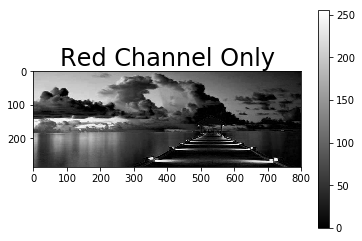

In [11]:
### BEGIN SOLUTION

### END SOLUTION

Same for the green channel: 

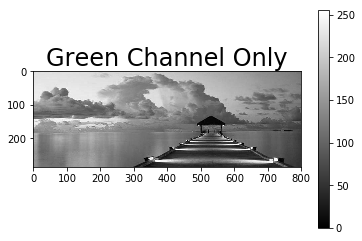

In [12]:
### BEGIN SOLUTION

### END SOLUTION

And for the blue channel...

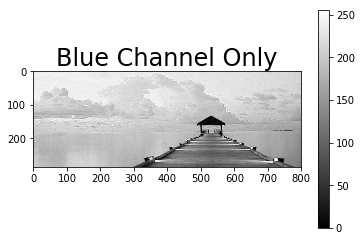

In [13]:
### BEGIN SOLUTION

### END SOLUTION

Can you see from the grayscale images that the RGB image is mostly blue? 

# Practice some basic PyGame commands:

#### Getting the coordinates of the mouse:

In pygame, you'll get the coordinates of the mouse cursor using the command <br>

X,Y = pygame.mouse.get_pos()

We'll assume for now that you already have the X and Y coordinates of the mouse cursor. 

**HINT**: X tells you which **column**; Y tells you which **row** 

In [14]:
X = 150
Y = 200

Grab the pixel intensity of each color in the X (column), Y (row) position. <br>

**WARNING**: think about this slowly... X -> columns, Y -> rows... 

In [25]:
### BEGIN SOLUTION

### END SOLUTION
print R_sig, G_sig, B_sig

186 173 193


We'll map the pixel's intensity at each channel to the volume of the sound assigned to represent that channel. 

One way to do it is to normalize the intensity of the pixel by the maximum value of the entire channel. Do that for each channel, and store as volume variables (R_vol_pix, G_vol_pix, B_vol_pix)

In [26]:
R_vol_pix = R_sig / np.float(max_red)
### BEGIN SOLUTION

### END SOLUTION

#### Loading and playing soundfiles using pygame

In [27]:
# Start the mixer class: 
pygame.mixer.init()

Choose three different instrument-notes from the "sound_dir" directory. <br>
Load them as sounds using the pygame.mixer.Sound() function, and store them separately as soundRed, soundGreen, and soundBlue variables.

In [33]:
soundRed = pygame.mixer.Sound("sound_dir/double-bass_C2.ogg")
### BEGIN SOLUTION

### END SOLUTION

Set the volume of the sound using the set_volume(my_volume) function. 

Play each sound using the play() method.   

Play the "Red sound"

In [34]:
### BEGIN SOLUTION

### END SOLUTION

Play the "Green sound"

In [35]:
### BEGIN SOLUTION

### END SOLUTION

"Play the Blue sound"

In [36]:
### BEGIN SOLUTION

### END SOLUTION

You can play the three tones, one after the other, with a time delay as follows: 

In [37]:
sound_delay = 0.5 # in seconds

soundRed.set_volume(R_vol_pix)
soundRed.play()
time.sleep(sound_delay)

soundGreen.set_volume(G_vol_pix)
soundGreen.play()
time.sleep(sound_delay)

soundBlue.set_volume(B_vol_pix)
soundBlue.play()
time.sleep(sound_delay)

# Putting everything together in a Python Script

Use Sublime Text Editor to open the file RGB_Synesthesia.py and follow the instructions. 

Since you've already done all the work here, feel free to copy-and-paste the relevant code to the relevant sections. 

Once you're done, to execute the code, open your terminal (Windows?), and in the directory where the script is stored, type:

python RGB_Synesthesia.py